<a href="https://colab.research.google.com/github/tewei0328/TS/blob/master/TS_datareader_Fourier_markup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Remote Data Access
* 參考資料: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
* colab內已安裝有pandas_DataReader
* 參考資料: https://ithelp.ithome.com.tw/articles/10205113


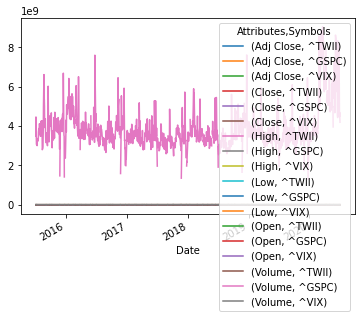

In [5]:
import pandas_datareader as pdr
df_many = pdr.DataReader(['^TWII', '^GSPC', '^VIX'], 'yahoo')
df=df_many.Close
df_many.plot()

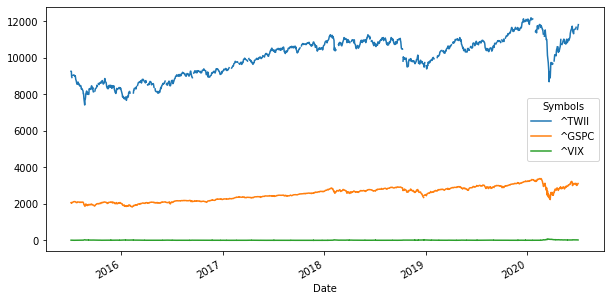

In [ ]:
df_many.Close.plot(figsize=(10,5))

In [ ]:
df['^GSPC*5']=df['^GSPC']*5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['^VIX*100']=df['^VIX']*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

Symbols,^TWII,^GSPC,^VIX,^GSPC*5,^VIX*500
Date,,,,,
2015-07-06,9255.959961,2068.760010,17.010000,10343.800049,8505.000114
2015-07-07,9250.160156,2081.340088,16.090000,10406.700439,8045.000076
2015-07-08,8976.110352,2046.680054,19.660000,10233.400269,9829.999924
2015-07-09,8914.129883,2051.310059,19.969999,10256.550293,9984.999657
2015-07-10,NaN,2076.620117,16.830000,10383.100586,8414.999962
...,...,...,...,...,...
2020-06-26,NaN,3009.050049,34.730000,15045.250244,17364.999771
2020-06-29,11542.620117,3053.239990,31.780001,15266.199951,15890.000343
2020-06-30,11621.240234,3100.290039,30.430000,15501.450195,15215.000153


In [ ]:
#del df['^VIX*500']
del df['^GSPC']
del df['^VIX']

In [ ]:
df_many.Close

Symbols,^TWII,^GSPC,^VIX
Date,,,
2015-07-06,9255.959961,2068.760010,17.010000
2015-07-07,9250.160156,2081.340088,16.090000
2015-07-08,8976.110352,2046.680054,19.660000
2015-07-09,8914.129883,2051.310059,19.969999
2015-07-10,NaN,2076.620117,16.830000
...,...,...,...
2020-06-26,NaN,3009.050049,34.730000
2020-06-29,11542.620117,3053.239990,31.780001
2020-06-30,11621.240234,3100.290039,30.430000


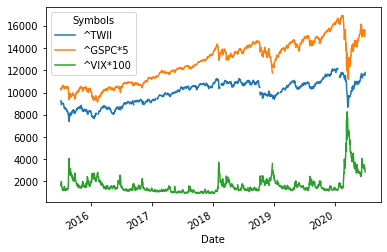

In [ ]:
df.plot()

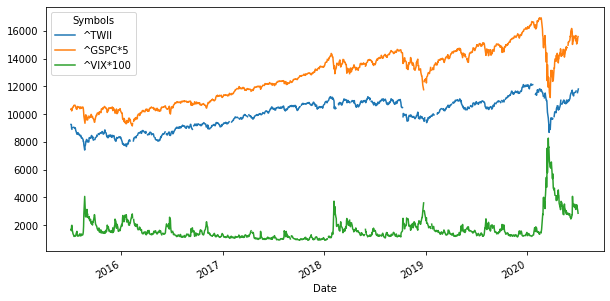

In [ ]:
df.plot(figsize=(10,5))

# 2. Fourier Transform
* 傅立葉發現任意複雜的信號都能由一個個混合在一起的正弦函數的和來表示
* 參考程式碼: https://github.com/tewei0328/stockpredictionai#fouriertransform
* 只用幾項sine waves就可來近似原函數: https://kknews.cc/education/j934zvq.html
* 原理介紹: https://kknews.cc/education/p6qjkxp.html

In [1]:
import pandas_datareader as pdr
df_many = pdr.DataReader(['^TWII', '^GSPC', '^VIX'], 'yahoo')
df=df_many.Close

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
""" Code to create the Fuorier trasfrom  """
#-----------------------------------------------
#1.要先將series資料轉成list, 再轉成np的array, 如此才能使用np的fast Fourier transform
data_FT = df['^TWII']
data_FT=data_FT.dropna() #除去空值, 否則fft會跑不出來結果
close_fft = np.fft.fft(np.asarray(data_FT.tolist()))
#-----------------------------------------------
#2.畫圖前, 要先將資料載回dataframe
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [30]:
data_FT.head()

Date
2015-07-06    9255.959961
2015-07-07    9250.160156
2015-07-08    8976.110352
2015-07-09    8914.129883
2015-07-13    9033.919922
Name: ^TWII, dtype: float64

In [31]:
fft_df.head()

,fft,absolute,angle
0,1.217113e+07+0.000000e+00j,1.217113e+07,0.000000
1,-2.816083e+05+5.756518e+05j,6.408418e+05,2.025766
2,1.789546e+05+4.115206e+05j,4.487471e+05,1.160602
3,-8.081201e+04+2.648527e+05j,2.769071e+05,1.866944
4,-4.529803e+04+7.561839e+04j,8.814790e+04,2.110506


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


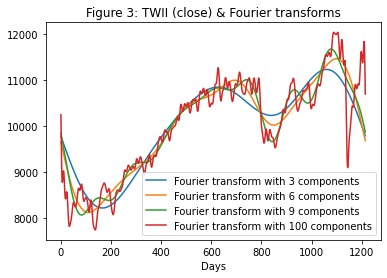

In [44]:
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

plt.xlabel('Days')
plt.ylabel('')
plt.title('Figure 3: TWII (close) & Fourier transforms')
plt.legend()

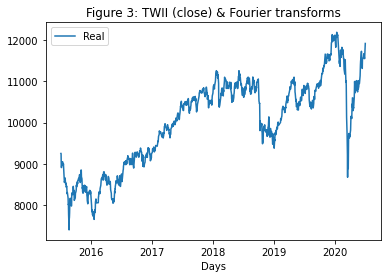

In [37]:
plt.plot(data_FT,  label='Real')
plt.xlabel('Days')
plt.ylabel('')
plt.title('Figure 3: TWII (close) & Fourier transforms')
plt.legend()
plt.show()

# 3. plot

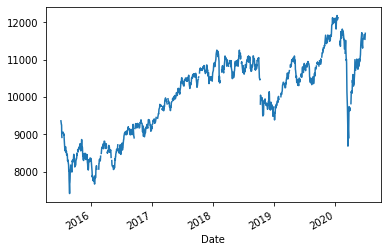

In [ ]:
df_many.Close['^TWII'].plot()

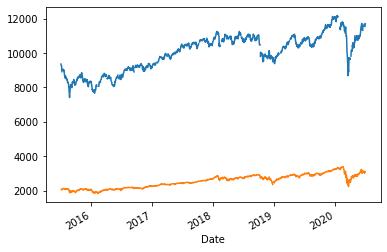

In [ ]:
df_many.Close['^TWII'].plot()
df_many.Close['^GSPC'].plot()

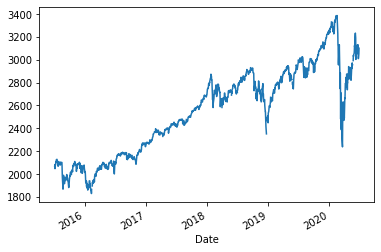

In [ ]:
df_many.Close['^GSPC'].plot()

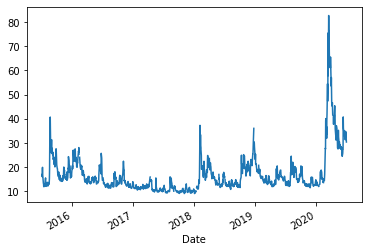

In [ ]:
df_many.Close['^VIX'].plot()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


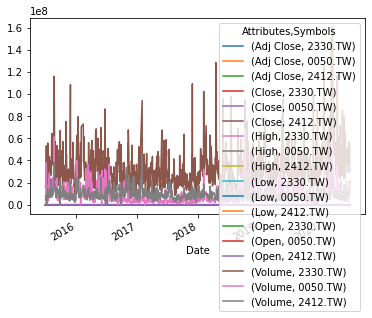

In [ ]:
import pandas_datareader as pdr
df_many = pdr.DataReader(['2330.TW', '0050.TW', '2412.TW'], 'yahoo')
df_many.plot()

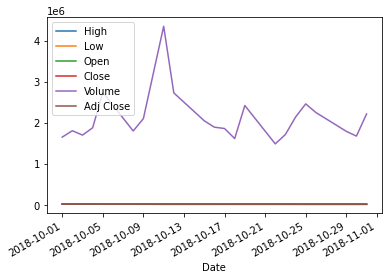

In [ ]:
startTime = '2018-10-01'
endTime = '2018-10-30'
df_2330 = pdr.DataReader('^TWII', 'yahoo', startTime, endTime)
df_2330.plot()

# 4. YAHOO股票代號查詢
https://finance.yahoo.com/world-indices/

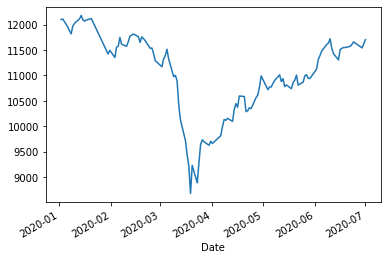

In [ ]:
startTime = '2020-01-01'
endTime = '2020-07-01'
df_twii = pdr.DataReader('^TWII', 'yahoo', startTime, endTime)
df_twii.Close.plot()

In [ ]:
df_2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,264.0,261.0,262.0,263.0,22254380,252.626572
2018-10-02,263.0,257.0,262.0,257.5,38391491,247.343506
2018-10-03,260.0,257.0,257.5,260.0,25228536,249.744904
2018-10-04,257.5,254.0,257.0,254.0,36408727,243.981567
2018-10-05,253.0,248.5,250.0,250.0,40204660,240.139328


In [ ]:
df_2330.describe()

,High,Low,Open,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,240.045455,235.181818,237.545455,237.795455,4.025299e+07,228.416165
std,12.694120,13.061708,13.117517,12.685443,1.760988e+07,12.185095
min,222.000000,217.000000,220.500000,219.500000,1.846379e+07,210.842331
25%,233.625000,227.250000,229.625000,229.625000,2.888478e+07,220.567974
50%,237.000000,230.250000,233.000000,236.750000,3.810478e+07,227.411942
75%,246.125000,241.750000,245.000000,243.875000,4.386518e+07,234.255924
max,264.000000,261.000000,262.000000,263.000000,9.458966e+07,252.626572


#5. 去除多餘欄位drop, axis=1

In [ ]:
df=df_2330.drop(['Volume','Adj Close'],axis=1)

In [ ]:
df.sample(5)

,High,Low,Open,Close
Date,,,,
2018-10-05,253.0,248.5,250.0,250.0
2018-10-17,243.0,238.0,241.5,238.5
2018-10-03,260.0,257.0,257.5,260.0
2018-10-16,237.0,229.0,229.5,237.0
2018-10-30,225.0,220.5,221.0,223.0


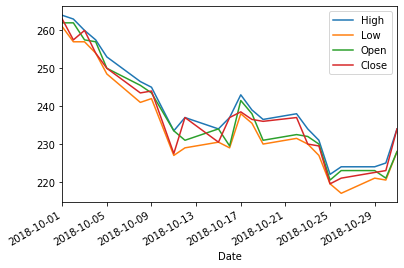

In [ ]:
df.plot()